In [ ]:
import pandas as pd
import json

path_1 = "/workspaces/fastmoonStreams/sample_data/pandasdf/books_unprocessed.csv"
path_2 = "/workspaces/fastmoonStreams/sample_data/pandasdf/books.csv"
path_3 = "/workspaces/fastmoonStreams/sample_data/pandasdf/books_processed.csv"

df_unprocessed = pd.read_csv(path_1)
df = pd.read_csv(path_2)
df_processed = pd.read_csv(path_3)

None is not in the list for trades_sells_bybit_ws_spot_spot_trades_bulk.json.


ValueError: min() arg is an empty sequence

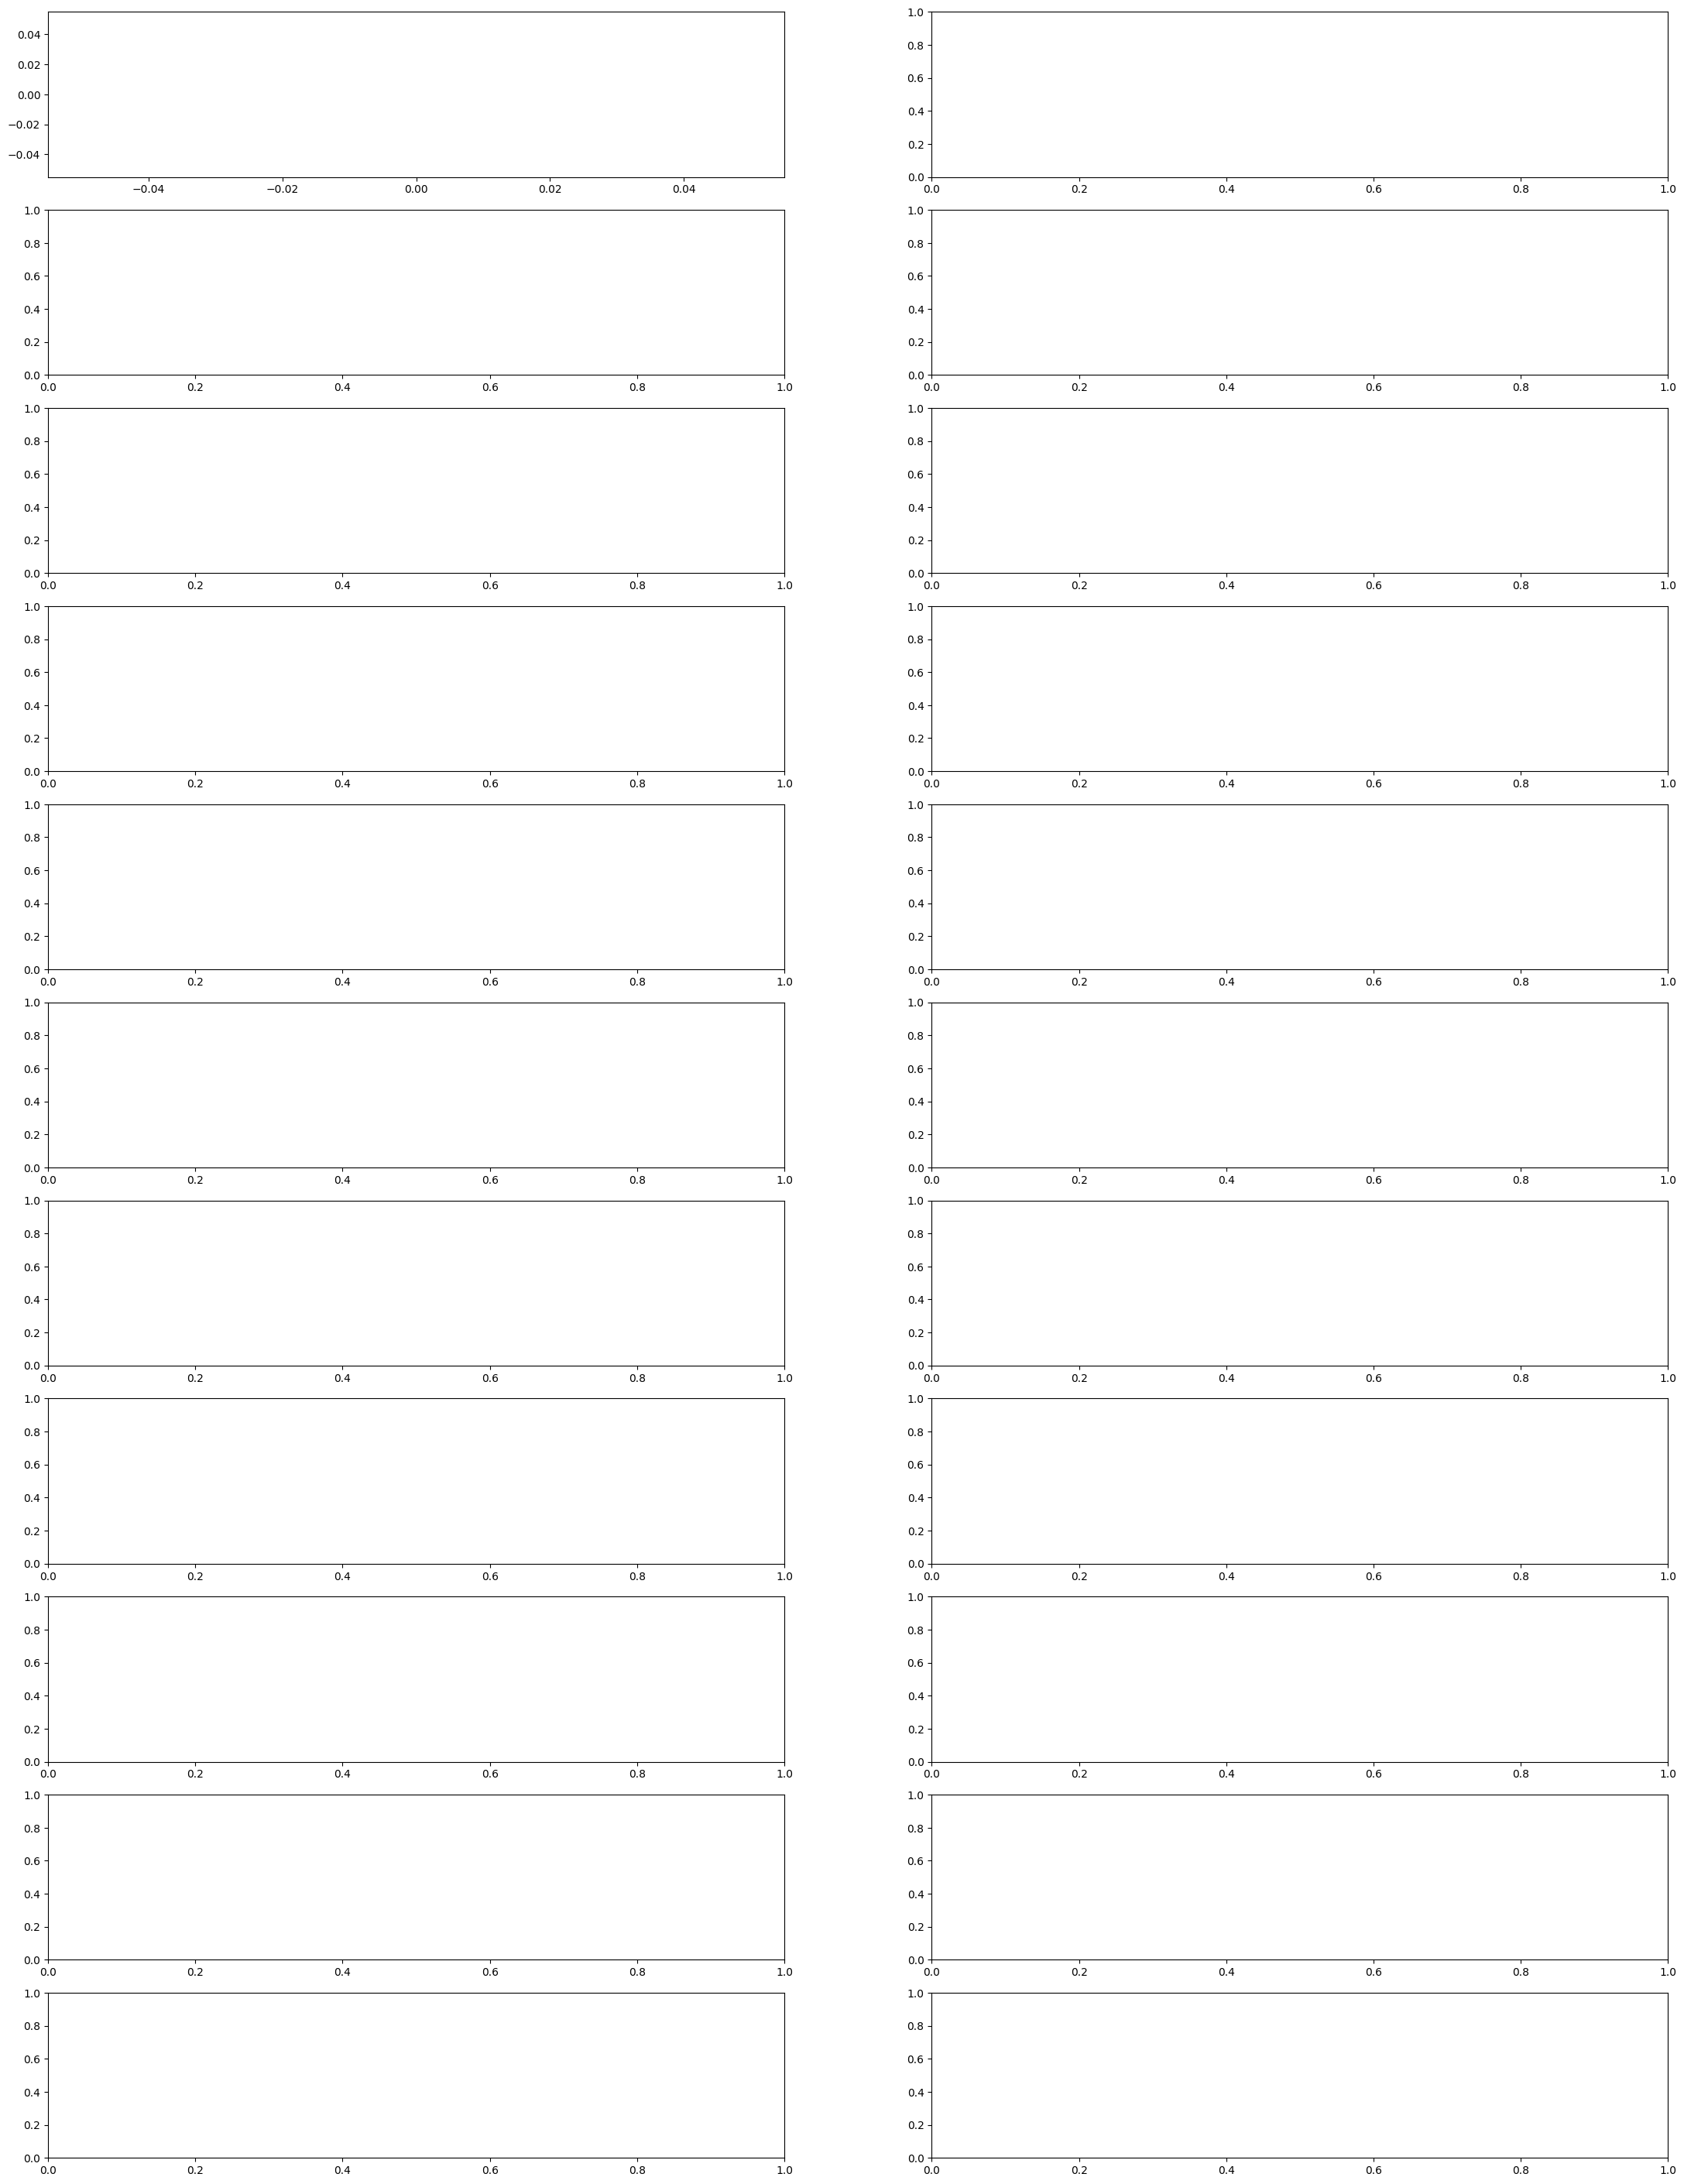

In [1]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import json
import numpy as np

data_dir = "sample_data/plots"
plot_files = [f for f in os.listdir(data_dir) if f.endswith('.json')]
num_plots = len(plot_files)

cols = 2  # Number of columns in the subplot grid (2 plots per row)
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate rows needed
fig, axes = plt.subplots(rows, cols, figsize=(27, 36))  # Adjust the layout and size as needed
axes = axes.flatten()
for i, plot_file in enumerate(plot_files):
    if "merged_option_oi" not in plot_file:
        plot_data = json.load(open(os.path.join(data_dir, plot_file), "r"))
        x = [str(x) for x in plot_data['x']]
        y = plot_data['y']
        price = str(plot_data.get("price"))

        try:
            special_bar_index = x.index(price)
        except ValueError:
            special_bar_index = None
            print(f'{price} is not in the list for {plot_file}.')

        ax = axes[i]
        bars = ax.bar(x, y)

        if special_bar_index is not None and "depth" in plot_file:
            bars[special_bar_index].set_color('red')
            # ax.text(x=special_bar_index + 0.2, y=y[special_bar_index] - (max(y) / 30), s='Current price', ha='left', fontsize=8, color='red')

        min_y = min(y)  if min(y) < 0 else 0
        ax.set_ylim(bottom=min_y, top=max(y) / 3)
        ax.set_xlabel(plot_data['xlabel'], fontsize=18)
        ax.set_ylabel(plot_data['ylabel'], fontsize=18)
        ax.set_title(plot_data['legend'], fontsize=18)
        ax.set_xticklabels(x, rotation=90, fontsize=14)
    else:
        nested_dict = json.load(open(os.path.join(data_dir, plot_file), "r"))
        plot_data = {price_range: {exp_range: nested_dict[price_range].get(exp_range, 0)
                      for exp_range in nested_dict[next(iter(nested_dict))]} for price_range in nested_dict}
        df = pd.DataFrame(plot_data).T 
        heats = ax.pcolormesh(df.values, cmap='viridis', edgecolors='k', linewidths=2)
        ax.set_xticks(np.arange(len(df.columns)) + 0.5, labels=df.columns)
        ax.set_yticks(np.arange(len(df.index)) + 0.5, labels=df.index)
        ax.set_title('Open Interest by Price and Expiration Ranges')
        ax.set_xlabel('Expiration Range')
        ax.set_ylabel('Price Range')
        
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=1)  # Adjust hspace as needed to reduce space between rows

# Display the plot
plt.show()